In [1]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Загрузим исходное изображение и покажем его:

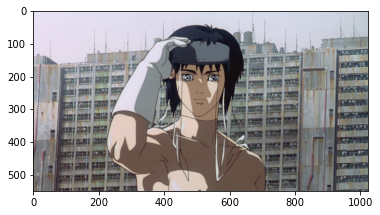

In [2]:
img = image.load_img("../input_image.jpg")
plt.imshow(img)

Преобразуем исходное изображение в матрицу с разменостью (x, y, 3):

In [3]:
image_matrix = image.img_to_array(img)

Начнём с простой реализации. Получаем исходную матрицу изображениия, а далее создаём матрицу такой же размерности, дабы избежать затирания исходной. Далее проходим по каждому RGB пикселю и умножаем значение каждого канала на введённый коэфициент яркости, проверяя при этом, чтобы он не вышел за пределы диапазона (0, 255). После прохождения всего изображения врозвращаем полученное "осветлённое":) Из-за такого алгоритма обработка занимает достаточно много времени и кушает цп.

In [4]:
def primitive_brightness(source_matrix, brightness):
    """loads cpu too much"""
    result = np.zeros(source_matrix.shape)
    for x in range(source_matrix.shape[0]):
        for y in range(source_matrix.shape[1]):
            r, g, b = source_matrix[x][y]

            red = int(r * brightness)
            red = min(255, max(0, red))

            green = int(g * brightness)
            green = min(255, max(0, green))

            blue = int(b * brightness)
            blue = min(255, max(0, blue))

            result[x][y] = red, green, blue 
    return result

Работа через оптимизированный numpy позволяет сдеать то же самое, что и primitive_brightness, но при этом затрачивая гораздо меньшее время цп за счёт работы со всей матрицей изображения. Метод np.clip() любезно позволяет привести все значения каналов пикселей в соответсвующий диапазон

In [5]:
def brightness(source_matrix, brightness):
    result = np.copy(source_matrix)
    result *= brightness
    result = np.clip(result, 0, 255) 
    return result

Применим вышеописанную функцию:

In [6]:
output_img_matrix = brightness(image_matrix, 1.6)

Преобразуем полученную матрицу в изображение и покажем её:

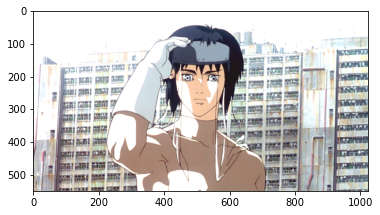

In [7]:
output_image = image.array_to_img(output_img_matrix)
plt.imshow(output_image)

Сохраним полученное изображение:

In [8]:
output_image.save("brightness_augmentation_output.jpg")